In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
print('Done') 

Done


# Iris Dataset

Using this lesson as a guide, perform clustering on the iris dataset.

- Choose features other than the ones used in the lesson.
- Visualize the results of your clustering.

In [2]:
# Load the Iris data set from seaborn
iris = sns.load_dataset('iris')
# Create a area features
iris['petal_area'] = iris['petal_width'] * iris['petal_length']
iris['sepal_area'] = iris['sepal_width'] * iris['sepal_length']
# Print the head to make sure it all worked correctly
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,petal_area,sepal_area
0,5.1,3.5,1.4,0.2,setosa,0.28,17.85
1,4.9,3.0,1.4,0.2,setosa,0.28,14.70
2,4.7,3.2,1.3,0.2,setosa,0.26,15.04
3,4.6,3.1,1.5,0.2,setosa,0.30,14.26
4,5.0,3.6,1.4,0.2,setosa,0.28,18.00


In [3]:
# Create a data frame with just the features we want to look at
X = iris[['sepal_length', 'sepal_width']]
# Use KMeans with 4 clusters (4 picked on a whim)
kmeans = KMeans(n_clusters=4)
# Fit the model 
kmeans.fit(X)
#Store the predicted results in the original data farme as a new feature cluster
iris['cluster'] = kmeans.predict(X)
#Predict results
kmeans.predict(X)


array([3, 0, 0, 0, 3, 3, 0, 3, 0, 0, 3, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 0, 3, 3, 3, 0, 0, 3, 3, 3, 0, 0, 3, 3, 0, 3, 3, 0, 0, 3,
       3, 0, 3, 0, 3, 0, 1, 1, 1, 2, 1, 2, 1, 0, 1, 0, 0, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 1, 2, 1, 2, 1, 1, 0, 1, 1, 1,
       1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2])

In [4]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,sepal_length,sepal_width
0,4.777778,2.944444
1,6.880488,3.097561
2,5.924528,2.750943
3,5.220690,3.665517


Text(0.5, 1.0, 'Visualizing Cluster Centers')

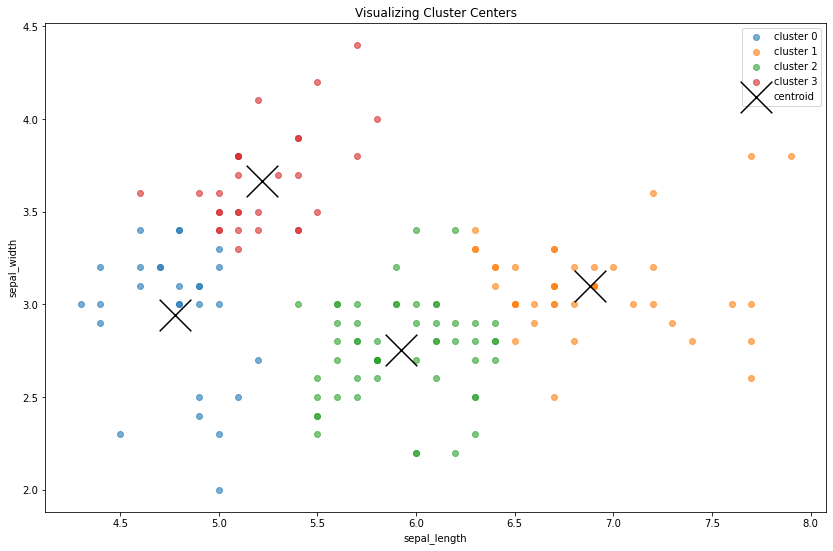

In [5]:
plt.figure(figsize=(14, 9))

for cluster, subset in iris.groupby('cluster'):
    plt.scatter(subset.sepal_length, subset.sepal_width, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='sepal_width', x='sepal_length', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.title('Visualizing Cluster Centers')

- Use the elbow method to visually select a good value for k.

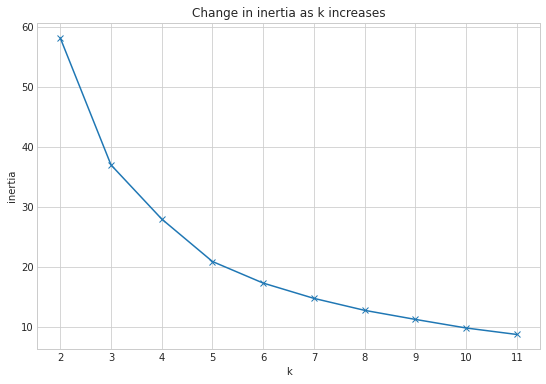

In [6]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

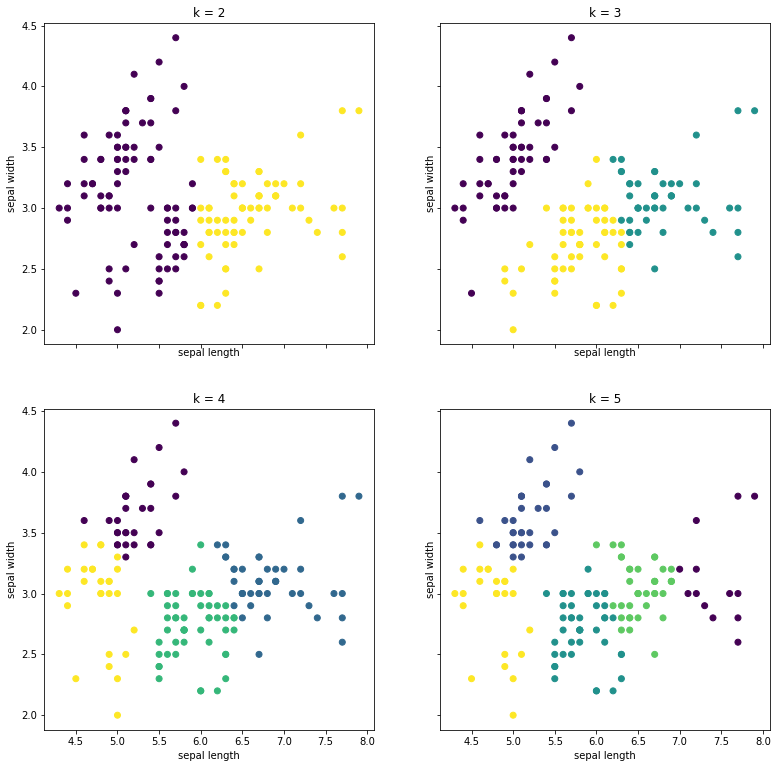

In [7]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.sepal_length, X.sepal_width, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal length', ylabel='sepal width')

- Repeat the clustering, this time with 3 different features.

In [8]:
# Create a data frame with just the features we want to look at
X = iris[['petal_area', 'sepal_length']]
# Use KMeans with 4 clusters (4 picked on a whim)
kmeans = KMeans(n_clusters=4)
# Fit the model 
kmeans.fit(X)
#Store the predicted results in the original data farme as a new feature cluster
iris['cluster'] = kmeans.predict(X)
kmeans.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 2, 3, 2, 2, 3, 2, 3, 2,
       3, 3, 2, 3, 2, 2, 3, 2, 2, 3, 2, 3, 2, 3, 2, 3, 3, 3, 2, 3, 2, 2,
       2, 3, 3, 2, 2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 3, 2, 3])

In [9]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,petal_area,sepal_length
0,5.420455,5.879545
1,0.365600,5.006000
2,12.974815,6.914815
3,9.034828,6.234483


Text(0.5, 1.0, 'Visualizing Cluster Centers')

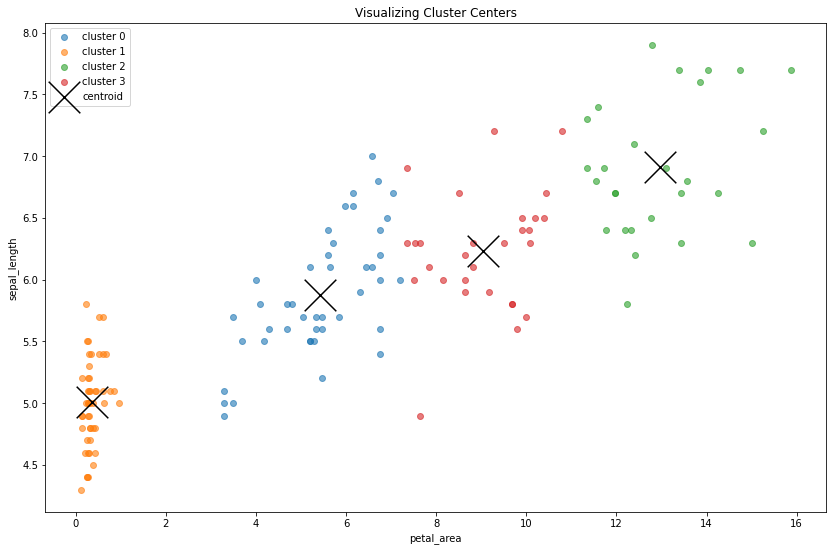

In [10]:
plt.figure(figsize=(14, 9))

for cluster, subset in iris.groupby('cluster'):
    plt.scatter(subset.petal_area, subset.sepal_length, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='sepal_length', x='petal_area', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('petal_area')
plt.ylabel('sepal_length')
plt.title('Visualizing Cluster Centers')

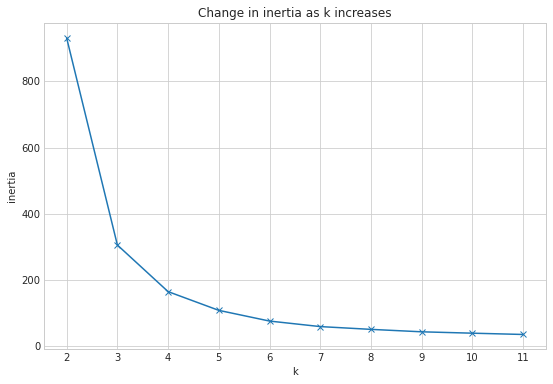

In [11]:
# Plot the elbow of the inertia of our KMeans choices
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

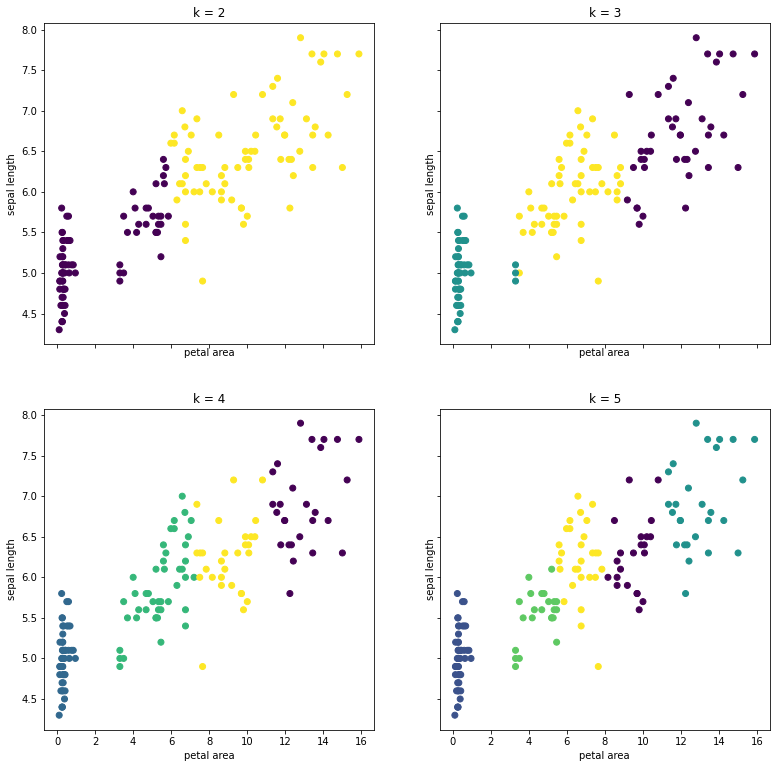

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.petal_area, X.sepal_length, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='petal area', ylabel='sepal length')

# Mall Dataset
- Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [13]:
import env

def get_connection(db, user=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

def get_mallcustomer_data():
    df = pd.read_sql('SELECT * FROM customers;', get_connection('mall_customers'))
    return df.set_index('customer_id')

mall = get_mallcustomer_data()
mall.head()


,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [16]:
X = mall[['age', 'annual_income']]

# Use KMeans with 4 clusters (4 picked on a whim)
kmeans = KMeans(n_clusters=4)
# Fit the model 
kmeans.fit(X)
#Store the predicted results in the original data farme as a new feature cluster
mall['cluster'] = kmeans.predict(X)
#Predict results
kmeans.predict(X)

array([2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1,
       3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

In [17]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,age,annual_income
0,55.814815,51.777778
1,31.958904,72.958904
2,30.346939,29.265306
3,39.000000,106.500000


Text(0.5, 1.0, 'Visualizing Cluster Centers')

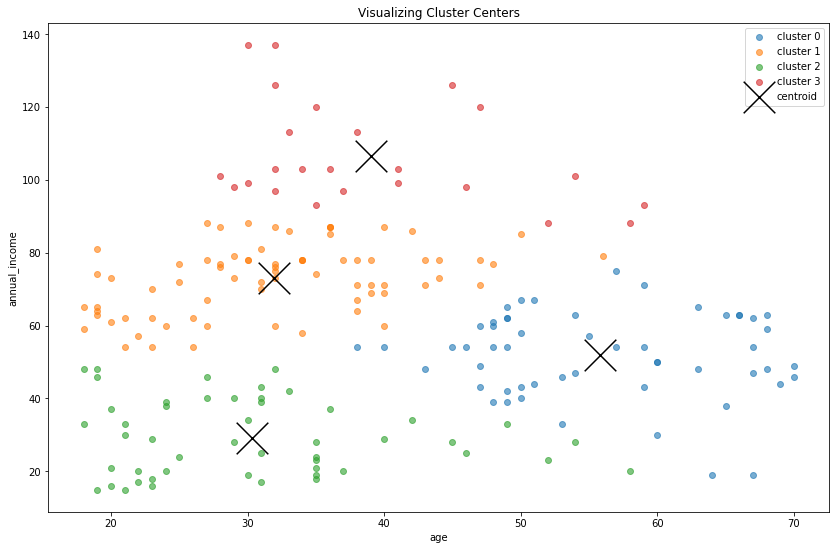

In [18]:
plt.figure(figsize=(14, 9))

for cluster, subset in mall.groupby('cluster'):
    plt.scatter(subset.age, subset.annual_income, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='annual_income', x='age', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('age')
plt.ylabel('annual_income')
plt.title('Visualizing Cluster Centers')

- How does scaling impact the results of clustering?
- Compare k-means clustering results on scaled and unscaled data. You can show how the resulting clusters differ either with descriptive statistics or visually.

Text(0.5, 1.0, 'Visualizing Cluster Centers')

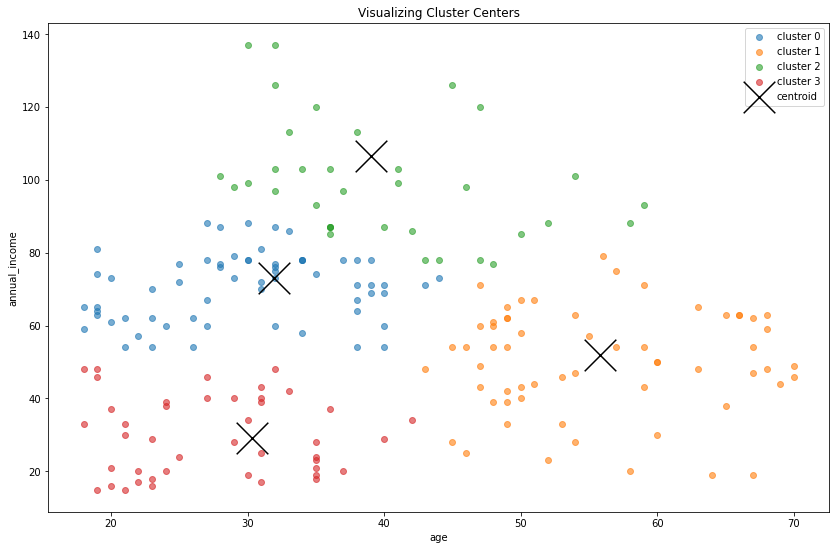

In [19]:
import sklearn.preprocessing 
scaler = sklearn.preprocessing.RobustScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(X)

X = scaler.transform(X)

kmeans = KMeans(n_clusters=4)
# Fit the model 
kmeans.fit(X)
#Store the predicted results in the original data farme as a new feature cluster
mall['cluster'] = kmeans.predict(X)

plt.figure(figsize=(14, 9))

for cluster, subset in mall.groupby('cluster'):
    plt.scatter(subset.age, subset.annual_income, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='annual_income', x='age', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('age')
plt.ylabel('annual_income')
plt.title('Visualizing Cluster Centers')

By scaling we get a tighter clusters with less bleed over into other cluster 